In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### The MNIST dataset

The MNIST dataset is composed of 70,000 $28 \times 28$ grayscale images of handwritten digits. It is represented as a $70000 \times 28 \times 28$ numpy array (a "3d matrix").

In [2]:
x = np.load("mnist.npy")
print(x.shape)

(70000, 28, 28)


Display the first few digits in the dataset.

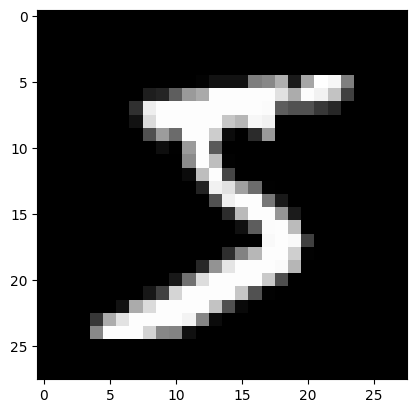

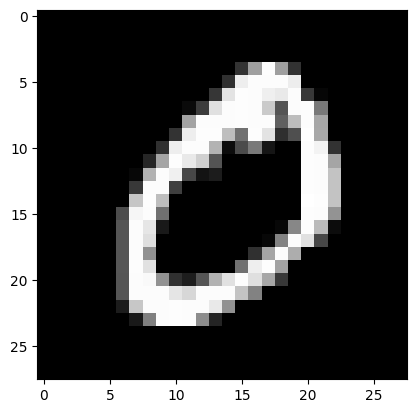

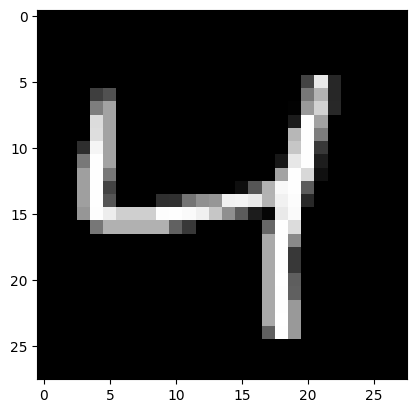

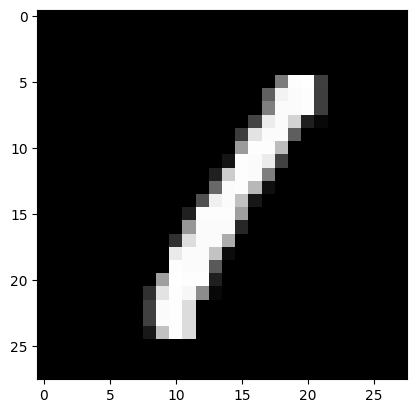

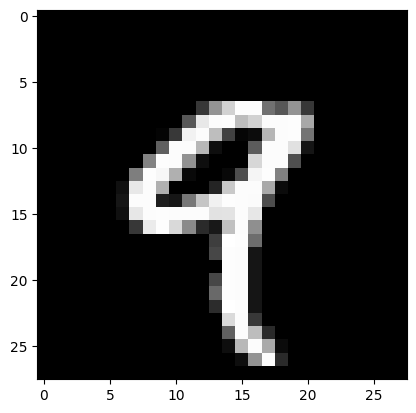

In [3]:
for i in range(5):
    plt.imshow(x[i], cmap="gray")
    plt.show()

### Computing and diagonalizing the covariance of MNIST

We will interpret each image as a vector in $\mathbb{R}^{d}$ with $d = 28^2 = 768$. The dataset can thus be seen as a matrix $in \mathbb{R}^{n \times d}$ where $n = 70000$. 

In [4]:
xx = x.reshape((x.shape[0], -1))
xx

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

1) Compute the mean $\mu \in \mathbb R^{d}$ of the MNIST dataset and plot it as a $28 \times 28$ image.

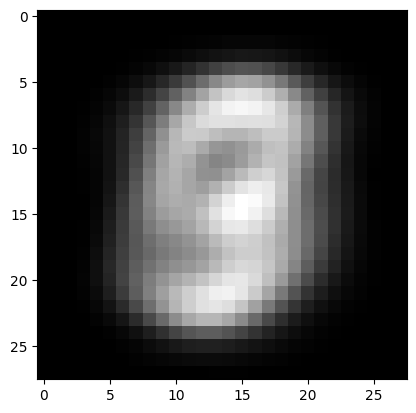

In [5]:
# Your answer here
mean_vector = xx.mean(axis=0)
mean_image = mean_vector.reshape((28,28))
plt.imshow(mean_image, cmap="gray")

2) Compute the covariance $\Sigma \in \mathbb{R}^{d \times d}$ of the MNIST dataset and diagonalize it using the function `np.linalg.eigh`.

In [11]:
# Your answer here
cov_matrix = (1 / x.shape[0]) * (xx - mean_vector).T @ (xx - mean_vector)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
eigenvalues, eigenvectors

(array([-5.15746893e-11, -3.68566679e-11, -2.92211626e-11, -2.79618506e-11,
        -2.53277348e-11, -1.31927665e-11, -1.09494873e-11, -5.24653862e-12,
        -4.97795591e-12, -2.78329396e-12, -1.99441793e-12, -1.48201503e-12,
        -1.24654450e-12, -7.01845945e-13, -5.40819685e-13, -3.64230139e-13,
        -3.54149030e-13, -2.97937985e-14, -1.08470422e-14, -8.96341966e-16,
        -6.05659620e-16, -3.56535501e-16, -1.60072184e-16, -3.84226201e-17,
        -1.57789003e-17, -9.51191829e-18, -3.31040598e-18, -1.99638673e-27,
        -8.06288238e-28, -2.10334352e-28,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.80550928e-28,  6.37374188e-28,
         1.78773343e-27,  2.70679504e-17,  3.23563278e-17,  1.60320976e-16,
         3.6

3) Plot the ordered eigenvalues $\lambda_1 \geq \cdots \geq \lambda_k \geq \cdots$ as a function $k = 1, \dots, d$ with the x axis in log scale, and the first few eigenvectors $u_1, \dots, u_k, \dots$ as $28 \times 28$ images.

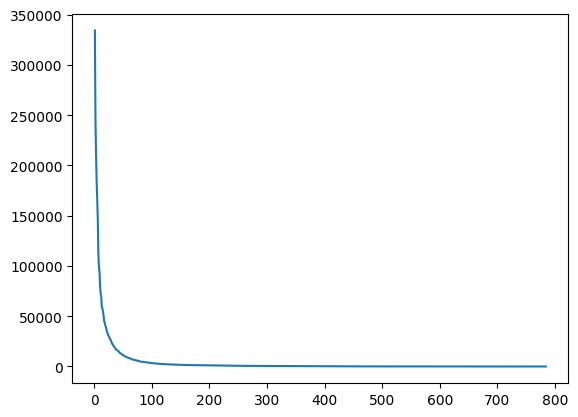

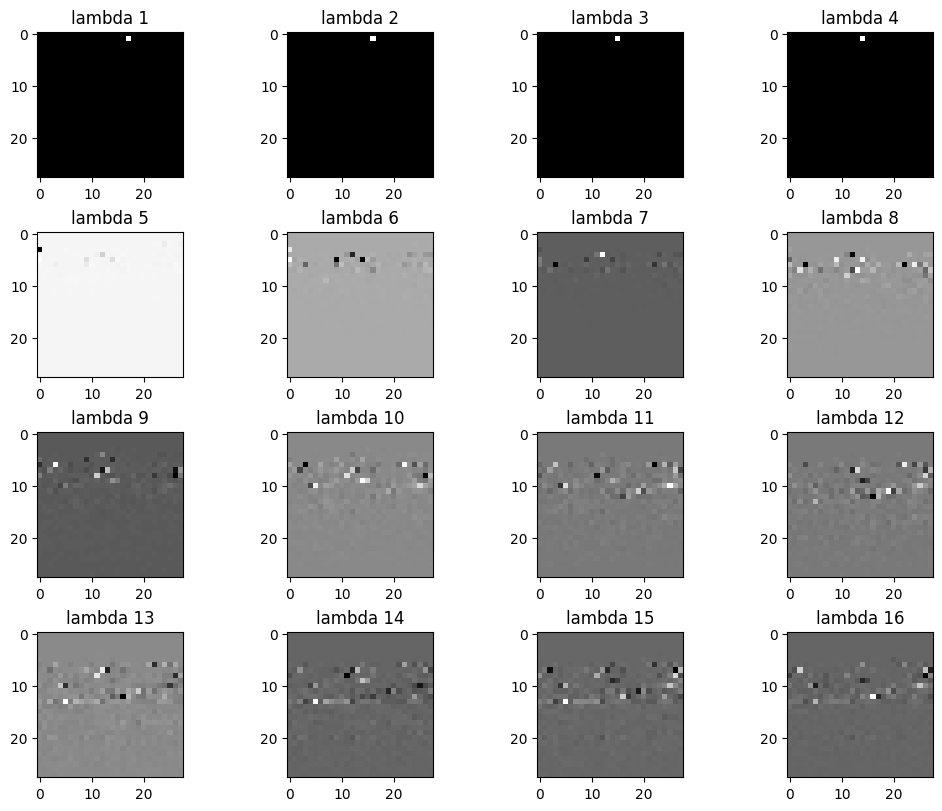

In [47]:
# Your answer here
eigenvalues_tuples = [(i, eigenvalues[i]) for i in range(len(eigenvalues))]
sorted_eigenvalues = sorted(eigenvalues_tuples, key = lambda x: x[1], reverse=True)
sorted_eigenvectors = eigenvectors[list(map(lambda x: x[0], sorted_eigenvalues))]

plt.plot(range(1,len(eigenvalues)+1),sorted(eigenvalues,reverse=True))
fig, axes = plt.subplots(4,4, layout='constrained', figsize=(10, 8))
for i in range(4):
    for j in range(4):
        index = 4 * i + j
        axes[i][j].imshow(sorted_eigenvectors[index].reshape(28, 28), cmap="gray")
        axes[i][j].set_title(f"lambda {index + 1}")

### PCA compression of MNIST

4) Let $k \in \mathbb N$. Compute the $k$-dimensional PCA approximation $z_1, \dots, z_n$ of the MNIST dataset using the eigenvectors $u_1, \dots, u_k$. Then, compute the reconstructed images $\hat x_i = \mu + z_{i,1} u_1 + \cdots + z_{i,k} u_k$, which are equal to the mean $\mu$ plus the orthogonal projection of $x_i - \mu$ on $\mathrm{Span}(u_1, \dots, u_k)$. Display the first 5 reconstructed images $\hat x_1, \dots, \hat x_5$. Choose a small value of $k$ that still allows recognizing the digits.

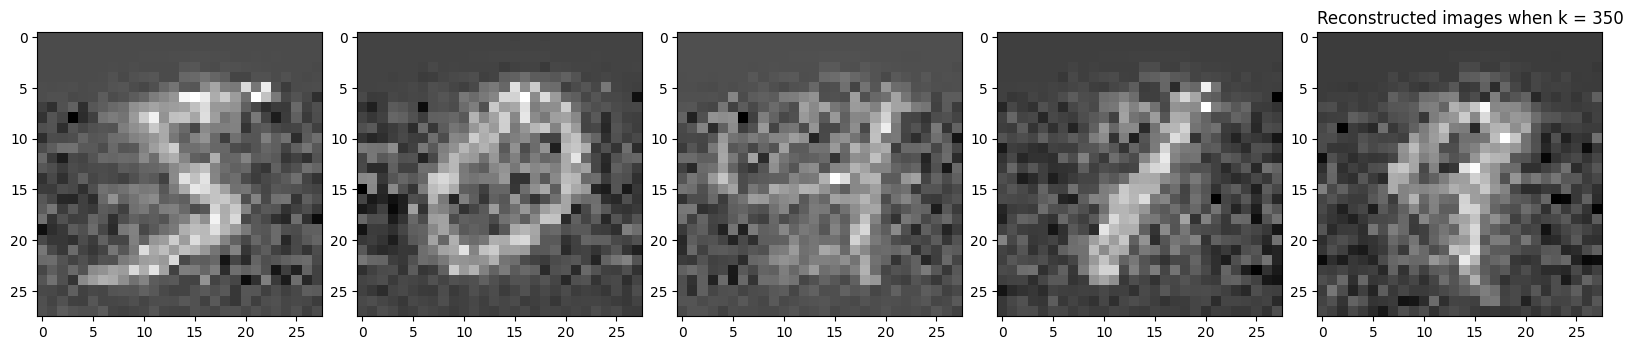

In [123]:
# Your answer here
# Compute the dimension of each data point
def dim_data(data):
    return data.shape[1]

# Compute the mean of the sample
def mean_data(data):
    return np.mean(data, axis=0)
    
    
# Compute the standard deviation of the sample
def sd_data(data):
    return (data - np.mean(data, axis=0)) / np.svd(data, axis=0)


# Centerize the data for further computation of the covariance matrix
def centerize_data(data):
    # Centerize the data
    return data - np.mean(data, axis=0)
    
# Compute the eigenbasis with k eigenvectors
def compute_eigenbasis_k(centered_data, k):
    # Compute the top k eigenvectors for our eigenbasis
    cov_matrix = 1 / len(centered_data) * centered_data.T @ centered_data
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    sorted_eigenvalues = sorted([(i, eigenvalues[i]) for i in range(len(eigenvalues))], key = lambda x: x[1], reverse=True)
    sorted_eigenvectors = eigenvectors[list(map(lambda x: x[0], sorted_eigenvalues))][:k]
    
    return sorted_eigenvectors.T
    
    
# Main Procedure: PCA
def PCA_procedure(data, k):
    centered_data = centerize_data(data)
    V_k = compute_eigenbasis_k(centered_data, k)
    
    # Find PCA coordinates
    Z_k = V_k.T @ centered_data.T
    
    # Z_k is a matrix with (k, 70000), where the coordinates for each data point is organized in columns
    return Z_k, V_k
    
    
# Main Procesure: Inverse PCA
def inverse_PCA_procedure(Z_k, V_k, data, k):
    centered_data = centerize_data(data)
    mu = data.mean(axis=0)
    
    # Revert to origin
    RC_k = V_k @ Z_k + mu.reshape(dim_data(data),1)
    
    
    # RC_k is a matrix with (784, 70000), where the reconstructed coordinates for each data point is organized in columns
    return RC_k
      
# Display the reconstructed images
def show_first_five_reconstructed(data, k):
    # Draw the first five reconstructed images
    fig, axes = plt.subplots(1, 5, figsize=(16,16), constrained_layout=True)

    Z_k, V_k = PCA_procedure(data, k)
    RC_k = inverse_PCA_procedure(Z_k, V_k, data, k)
    
    for i in range(5):
        axes[i].imshow(RC_k[:,i].reshape(28,28), cmap="gray")
    
    plt.title(f"Reconstructed images when k = {k}", loc = "left")
    
    
def problem_1(data):
    k = 350
    show_first_five_reconstructed(data, k)
    
    
def problem_2(data):
    k_list = [150, 200, 220, 240, 250, 260, 270, 280, 290, 300]
    for k in k_list:
        show_first_five_reconstructed(data, k)
    
    
# xx is (70000, 784)
problem_1(xx) # We pick 350, when we could recognize the reconstructed digits by raw eyes, which are 5,0,4,1,9

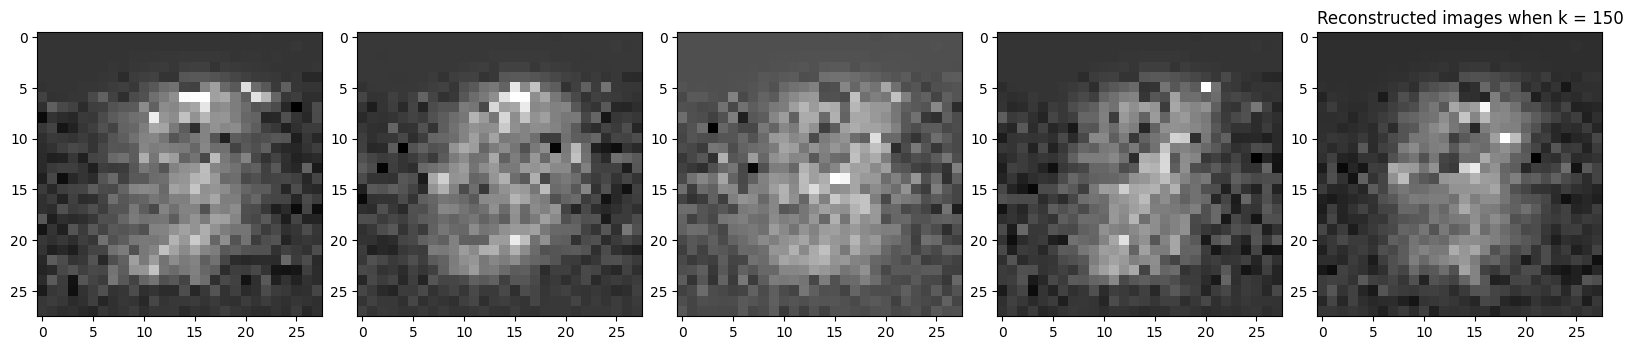

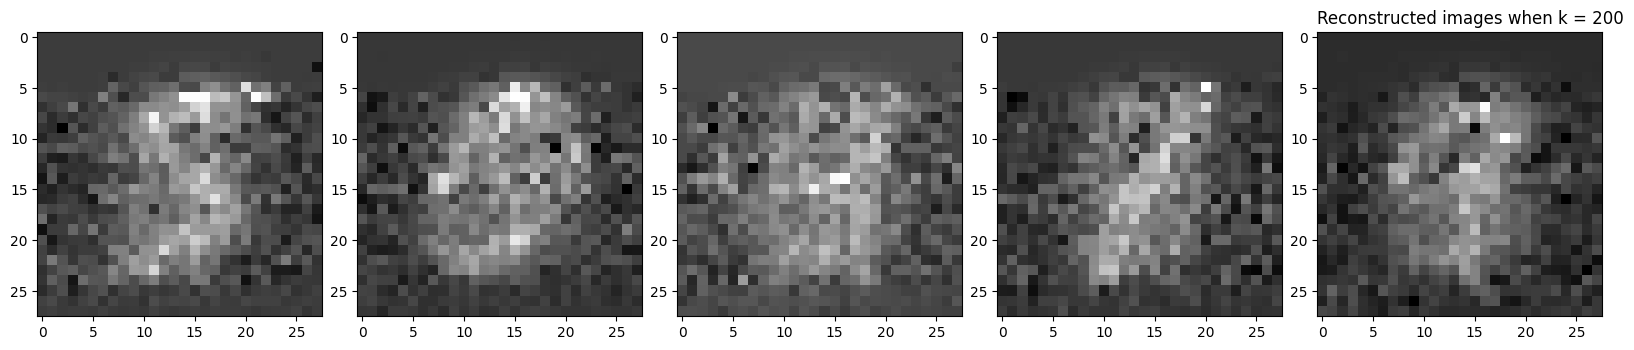

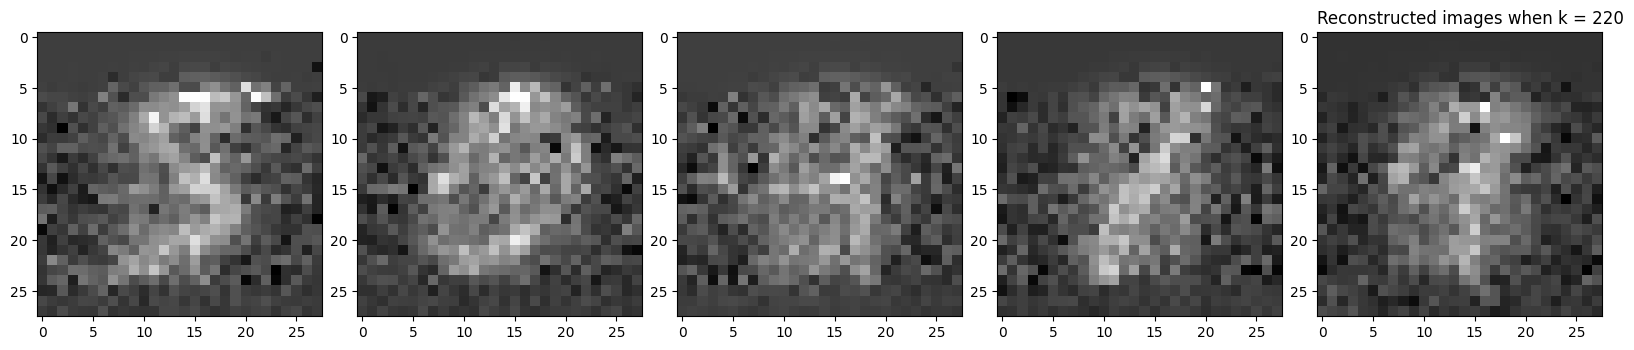

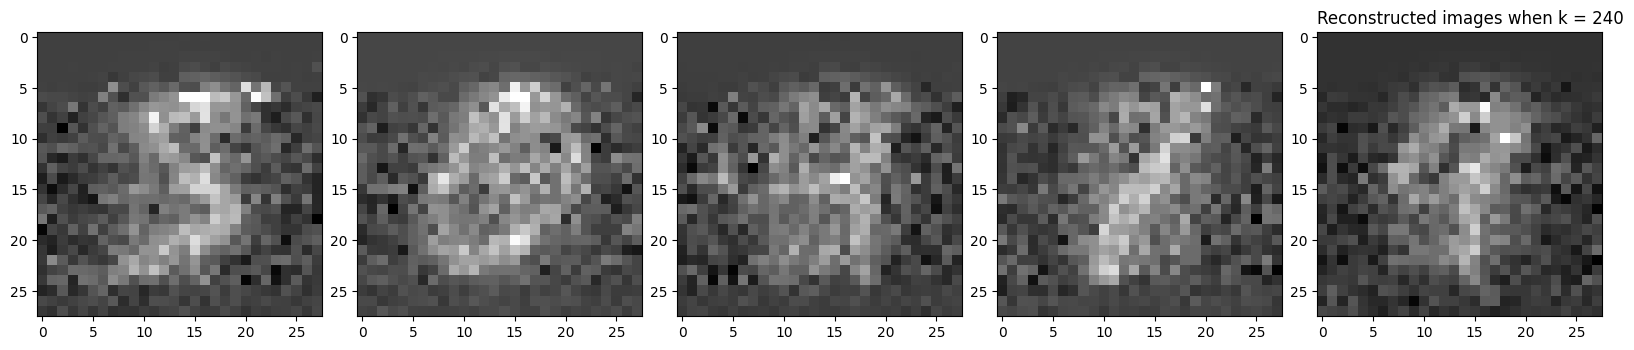

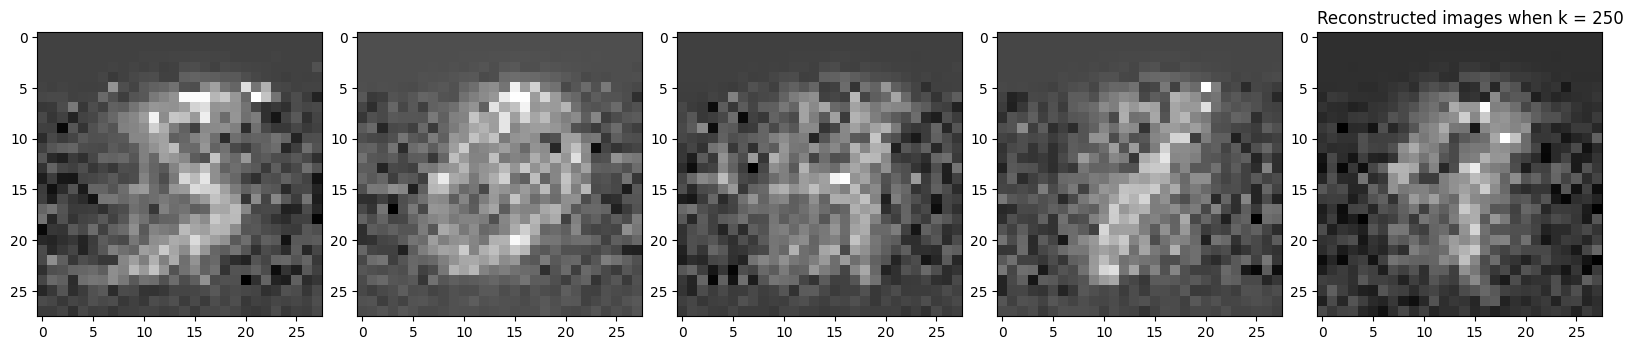

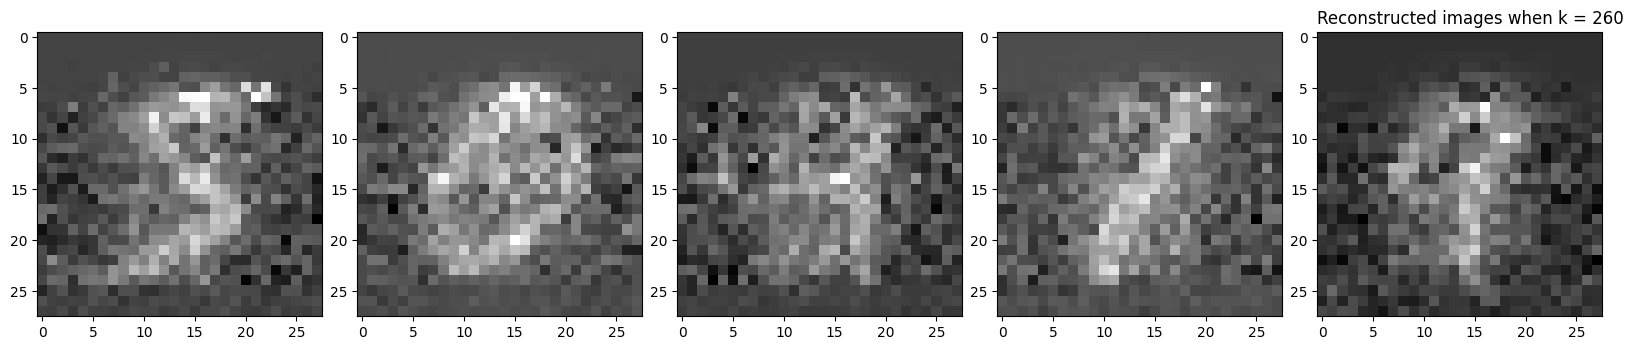

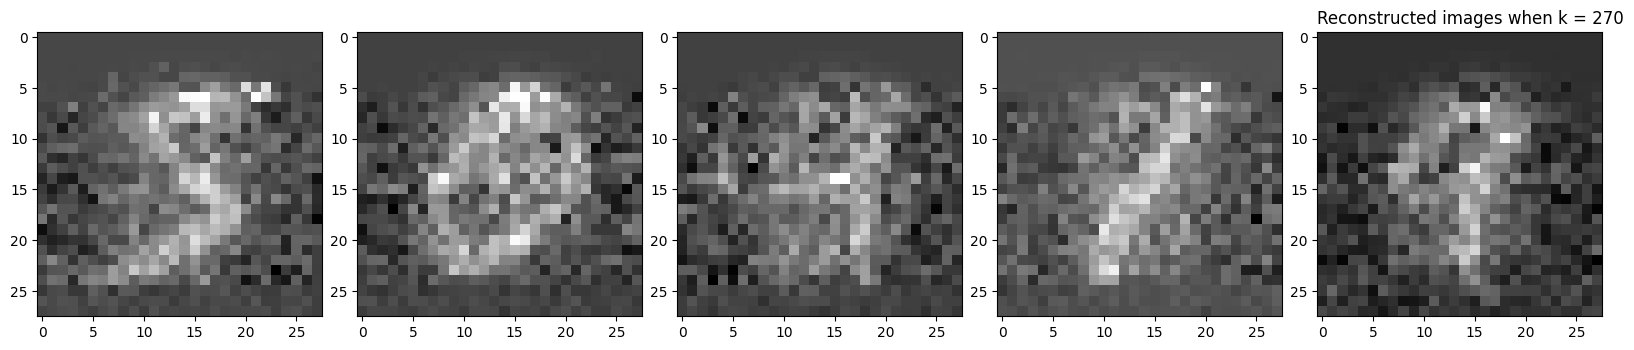

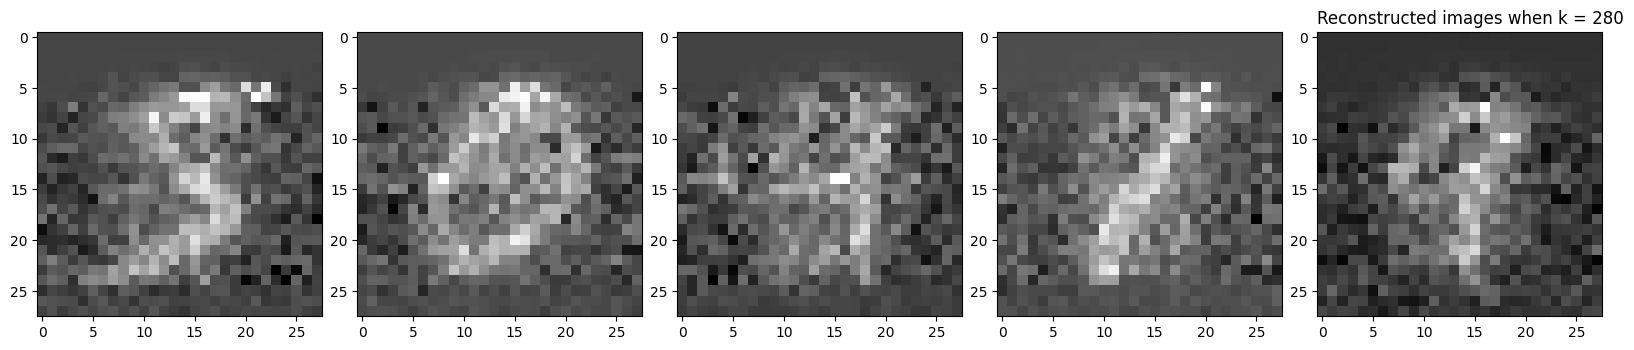

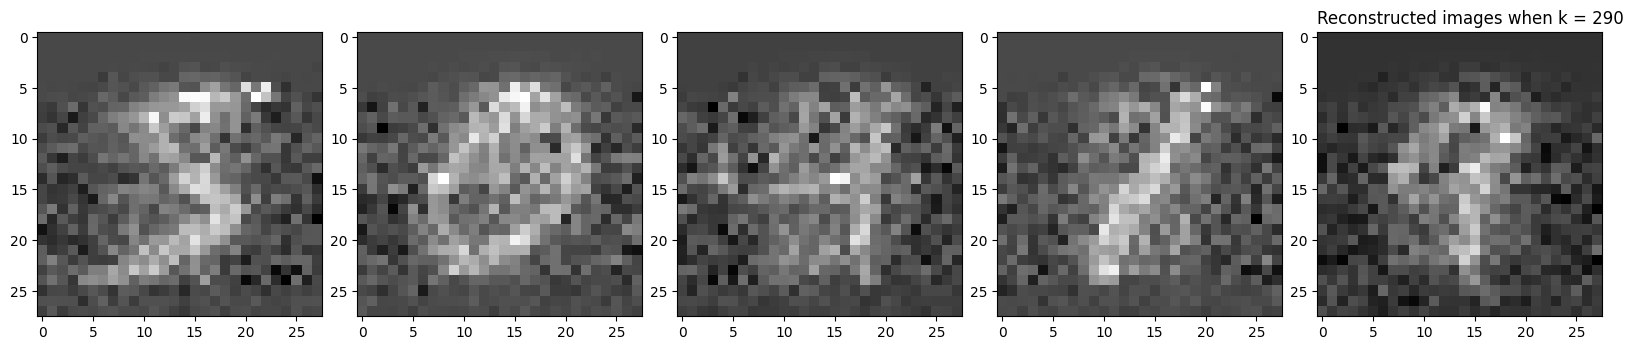

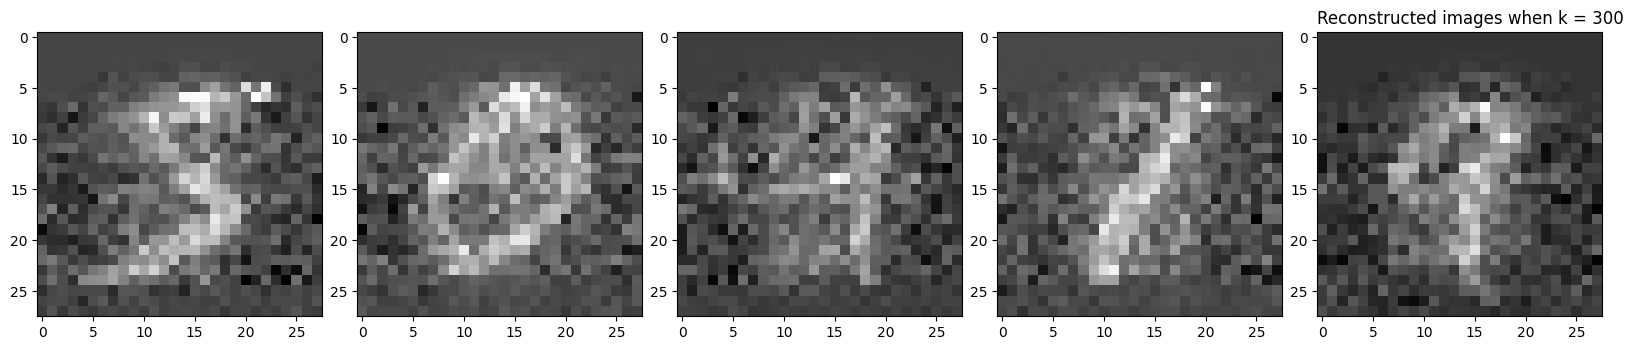

In [124]:
problem_2(xx) # We find that 300 is minimum number of eigenvectors that are needed to reconstruct the digits that can be recognized by raw eyes.